# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics         import plot_confusion_matrix
from sklearn.metrics         import ConfusionMatrixDisplay

%matplotlib inline

In [2]:
X_train = pd.read_csv(
    filepath_or_buffer="G:\Ebac 2\Modulo 17\Tarefa 2\output\X_train.csv", 
    index_col=['Unnamed: 0', 'subject_train'])
X_train

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_train,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,30,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811


In [3]:
y_train = (pd.read_csv(
    filepath_or_buffer=r"G:\Ebac 2\Modulo 17\download\UCI HAR Dataset\train\y_train.txt", 
    header=None).squeeze('columns'))
y_train


0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: 0, Length: 7352, dtype: int64

In [4]:
X_test = pd.read_csv(
    filepath_or_buffer="G:\Ebac 2\Modulo 17\Tarefa 2\output\X_test.csv", 
    index_col=['Unnamed: 0', 'subject_test'])
X_test

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_test,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,24,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,24,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184


In [5]:
X_test = pd.read_csv(
    filepath_or_buffer="G:\Ebac 2\Modulo 17\Tarefa 2\output\X_test.csv", 
    index_col=['Unnamed: 0', 'subject_test'])
X_test

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_test,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,24,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,24,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184


In [6]:
y_test = (pd.read_csv(
    filepath_or_buffer=r"G:\Ebac 2\Modulo 17\download\UCI HAR Dataset\test\y_test.txt", 
    header=None).squeeze('columns'))
y_test


0       5
1       5
2       5
3       5
4       5
       ..
2942    2
2943    2
2944    2
2945    2
2946    2
Name: 0, Length: 2947, dtype: int64

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, 
                                                      y_train, 
                                                      test_size=0.25, 
                                                      random_state=42)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('X_valid:', X_valid.shape)
print('y_valid:', y_valid.shape)

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (5514, 561)
y_train: (5514,)
X_valid: (1838, 561)
y_valid: (1838,)
X_test: (2947, 561)
y_test: (2947,)


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [8]:
clf = DecisionTreeClassifier(max_depth=4, 
                             random_state=42).fit(X=X_train, 
                                                  y=y_train)

three_best_vars = (pd.DataFrame(data={'var': X_train.columns, 
                                      'feature_importances_': clf.feature_importances_})
                     .sort_values(by='feature_importances_', 
                                  ascending=False))
print(three_best_vars)

cols = three_best_vars['var'].values[:3]
print('3 melhores variáveis:', cols)

                                     var  feature_importances_
52                53 tGravityAcc-min()-X              0.285303
389  390 fBodyAccJerk-bandsEnergy()-1,16              0.254091
41               42 tGravityAcc-mean()-Y              0.164608
214             215 tGravityAccMag-std()              0.140142
69          70 tGravityAcc-arCoeff()-Y,1              0.122278
..                                   ...                   ...
184        185 tBodyGyroJerk-entropy()-Z              0.000000
183        184 tBodyGyroJerk-entropy()-Y              0.000000
182        183 tBodyGyroJerk-entropy()-X              0.000000
181            182 tBodyGyroJerk-iqr()-Z              0.000000
560             561 angle(Z,gravityMean)              0.000000

[561 rows x 2 columns]
3 melhores variáveis: ['53 tGravityAcc-min()-X' '390 fBodyAccJerk-bandsEnergy()-1,16'
 '42 tGravityAcc-mean()-Y']


In [9]:
X_train[cols].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5514 entries, (6593, 28) to (7270, 30)
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   53 tGravityAcc-min()-X               5514 non-null   float64
 1   390 fBodyAccJerk-bandsEnergy()-1,16  5514 non-null   float64
 2   42 tGravityAcc-mean()-Y              5514 non-null   float64
dtypes: float64(3)
memory usage: 461.6 KB


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [10]:
import plotly.graph_objects as go

# Calcula o caminho de poda da complexidade de custo
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X=X_train[cols], 
                                                                            y=y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    # Treina o modelo com o ccp_alpha atual
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train[cols], y_train)
    clfs.append(clf)

# Calcula as pontuações de treino e validação para cada modelo
train_scores = [clf.score(X=X_train[cols], y=y_train) for clf in clfs]
valid_scores = [clf.score(X=X_valid[cols], y=y_valid) for clf in clfs]

# Cria os traces para os gráficos de treino e validação
trace_train = go.Scatter(x=ccp_alphas, y=train_scores, mode='lines+markers', name='Treino')
trace_valid = go.Scatter(x=ccp_alphas, y=valid_scores, mode='lines+markers', name='Validação')

# Cria o layout do gráfico
layout = go.Layout(title='Acurácia X Alpha do conjunto de dados de treino e validação',
                   xaxis=dict(title='Alpha'),
                   yaxis=dict(title='Acurácia'))

# Cria a figura
fig = go.Figure(data=[trace_train, trace_valid], layout=layout)

# Exibe o gráfico
fig.show()


In [11]:
# Encontra o índice da melhor árvore na base de validação
best_tree_index = valid_scores.index(max(valid_scores))
best_tree_score = valid_scores[best_tree_index]

# Seleciona a melhor árvore
best_tree = clfs[best_tree_index]

print(f'Acurácia da melhor árvore na base de validação: {best_tree_score * 100:.2f}')

best_tree


Acurácia da melhor árvore na base de validação: 89.45


DecisionTreeClassifier(ccp_alpha=0.0002747826469262813, random_state=42)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia da melhor árvore na base de testes: 68.85


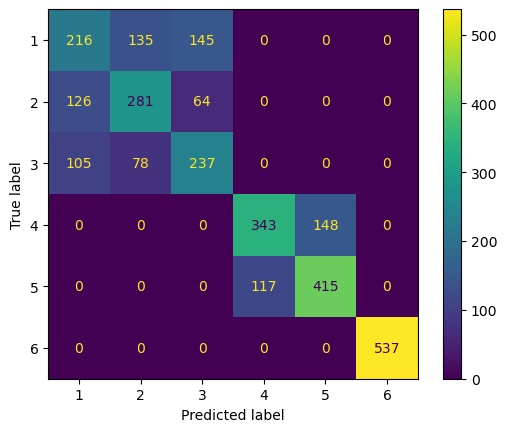

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Calcula a acurácia da melhor árvore na base de testes
accuracy_test = best_tree.score(X=X_test[cols], y=y_test)

print(f'Acurácia da melhor árvore na base de testes: {accuracy_test * 100:.2f}')

# Calcula a matriz de confusão
y_pred = best_tree.predict(X_test[cols])
cm = confusion_matrix(y_test, y_pred)

# Cria e exibe a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_tree.classes_)
disp.plot()
